# Importing Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
from data_augmentation import preprocess

c:\Users\pablo\anaconda3\envs\webapp_flask\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
test = tf.data.Dataset.load('split_tensor/test_ds/')
test_arr = np.array(list(test.as_numpy_iterator()))
masks = test_arr[:,1,:,:,:]
images = test_arr[:,0,:,:,:]

In [3]:
test = test.map(preprocess)
test = test.cache()
test = test.batch(6)

### Loading data

In [4]:
preds_models = np.load('model_comparison\preds_models_f.npy', allow_pickle=True)
unet = preds_models[0][1]
attr2unet = preds_models[2][1]
swinunet = preds_models[3][1]
denseunet = preds_models[4][1]
faunet = preds_models[5][1]
attunet = preds_models[6][1]
attdenseunet = preds_models[7][1]

In [5]:
len(preds_models)

8

In [6]:

preds = {}
for j in range(len(preds_models)):
    model_name = preds_models[j][0]
    preds[model_name] = preds_models[j][1]

list(preds.keys())

['unet',
 'r2unet',
 'attr2unet',
 'swinunet',
 'denseunet',
 'faunet',
 'attunet',
 'attdenseunet']

### Selecting images for plot

In [7]:
lst4 = []
lst3 = []
lst3t = []
lst2 = []
for i in range(len(masks)):
    if (0 in masks[i]) and (1 in masks[i]) and (2 in masks[i]) and (3 in masks[i]) and (4 in masks[i]):
        lst4.append(i)
    elif (0 in masks[i]) and (1 in masks[i]) and (2 in masks[i]) and (3 in masks[i]):
        lst3.append(i)
    elif (0 in masks[i]) and (1 in masks[i]) and (2 in masks[i]) and (4 in masks[i]):
        lst3t.append(i)
    elif (0 in masks[i]) and (1 in masks[i]) and (2 in masks[i]):
        lst2.append(i)

print('Lista 4: ', lst4)
print('Lista 3: ', lst3)
print('Lista 3tumor: ', lst3t)
print('Lista 2: ', lst2)


Lista 4:  [3, 6, 7, 19, 27, 29]
Lista 3:  [1, 2, 5, 11, 13, 15, 18, 20, 22, 26]
Lista 3tumor:  [4, 8, 17, 23]
Lista 2:  [0, 9, 10, 12, 14, 16, 21, 24, 25, 28, 30]


# Plots

## Crop and resize

Crop for all images

In [8]:
from functools import reduce
from skimage.transform import resize
start_idx = 256//3
end_idx = 2 * (256//3)

dict_imgs = {}
dict_msks = {}
dict_preds = {}
dict_entropy = {}

names_model = list(preds.keys())

for j in names_model:
    entropy_dict = {}
    preds_list = []
    for i in range(len(images)):
        cropped_img = images[i][start_idx:end_idx, start_idx:end_idx, :]
        dict_imgs[i] = resize(cropped_img, (256, 256), anti_aliasing=True)
        cropped_msk = masks[i][start_idx:end_idx, start_idx:end_idx, :]
        dict_msks[i] = resize(cropped_msk, (256, 256), anti_aliasing=True)
        cropped_pred= preds[j][i][start_idx:end_idx, start_idx:end_idx]
        # cropped_pred = resize(cropped_pred, (256, 256), anti_aliasing=True)
        
        # for k in list(normalized_entropy[j].keys()):
        #     cropped_ent = normalized_entropy[j][k][i][start_idx:end_idx, start_idx:end_idx]
        #     cropped_ent = resize(cropped_ent, (256, 256), anti_aliasing=False)
        #     entropy_dict[k] = cropped_ent


        preds_list.append(cropped_pred)
    preds_list = np.array(preds_list)
    
    # dict_entropy[j] = entropy_dict
    dict_preds[j] = preds_list



In [9]:
dict_preds['unet'].shape

(31, 85, 85)

In [10]:
# Selecting images
# Lista 4:  [3, 6, 7, 19, 27, 29]
# Lista 3:  [1, 2, 5, 11, 13, 15, 18, 20, 22, 26]
# Lista 3tumor:  [4, 8, 17, 23]
# Lista 2:  [0, 9, 10, 12, 14, 16, 21, 24, 25, 28, 30]

z2 = 30
# z2 = 0
z3 = 2
# z3 = 5
# z3t = 17
z3t = 23 
# z4 = 3
z4 = 29
#[3, 6, 7, 19, 27, 29]

## Prediction subplot

### Vertical

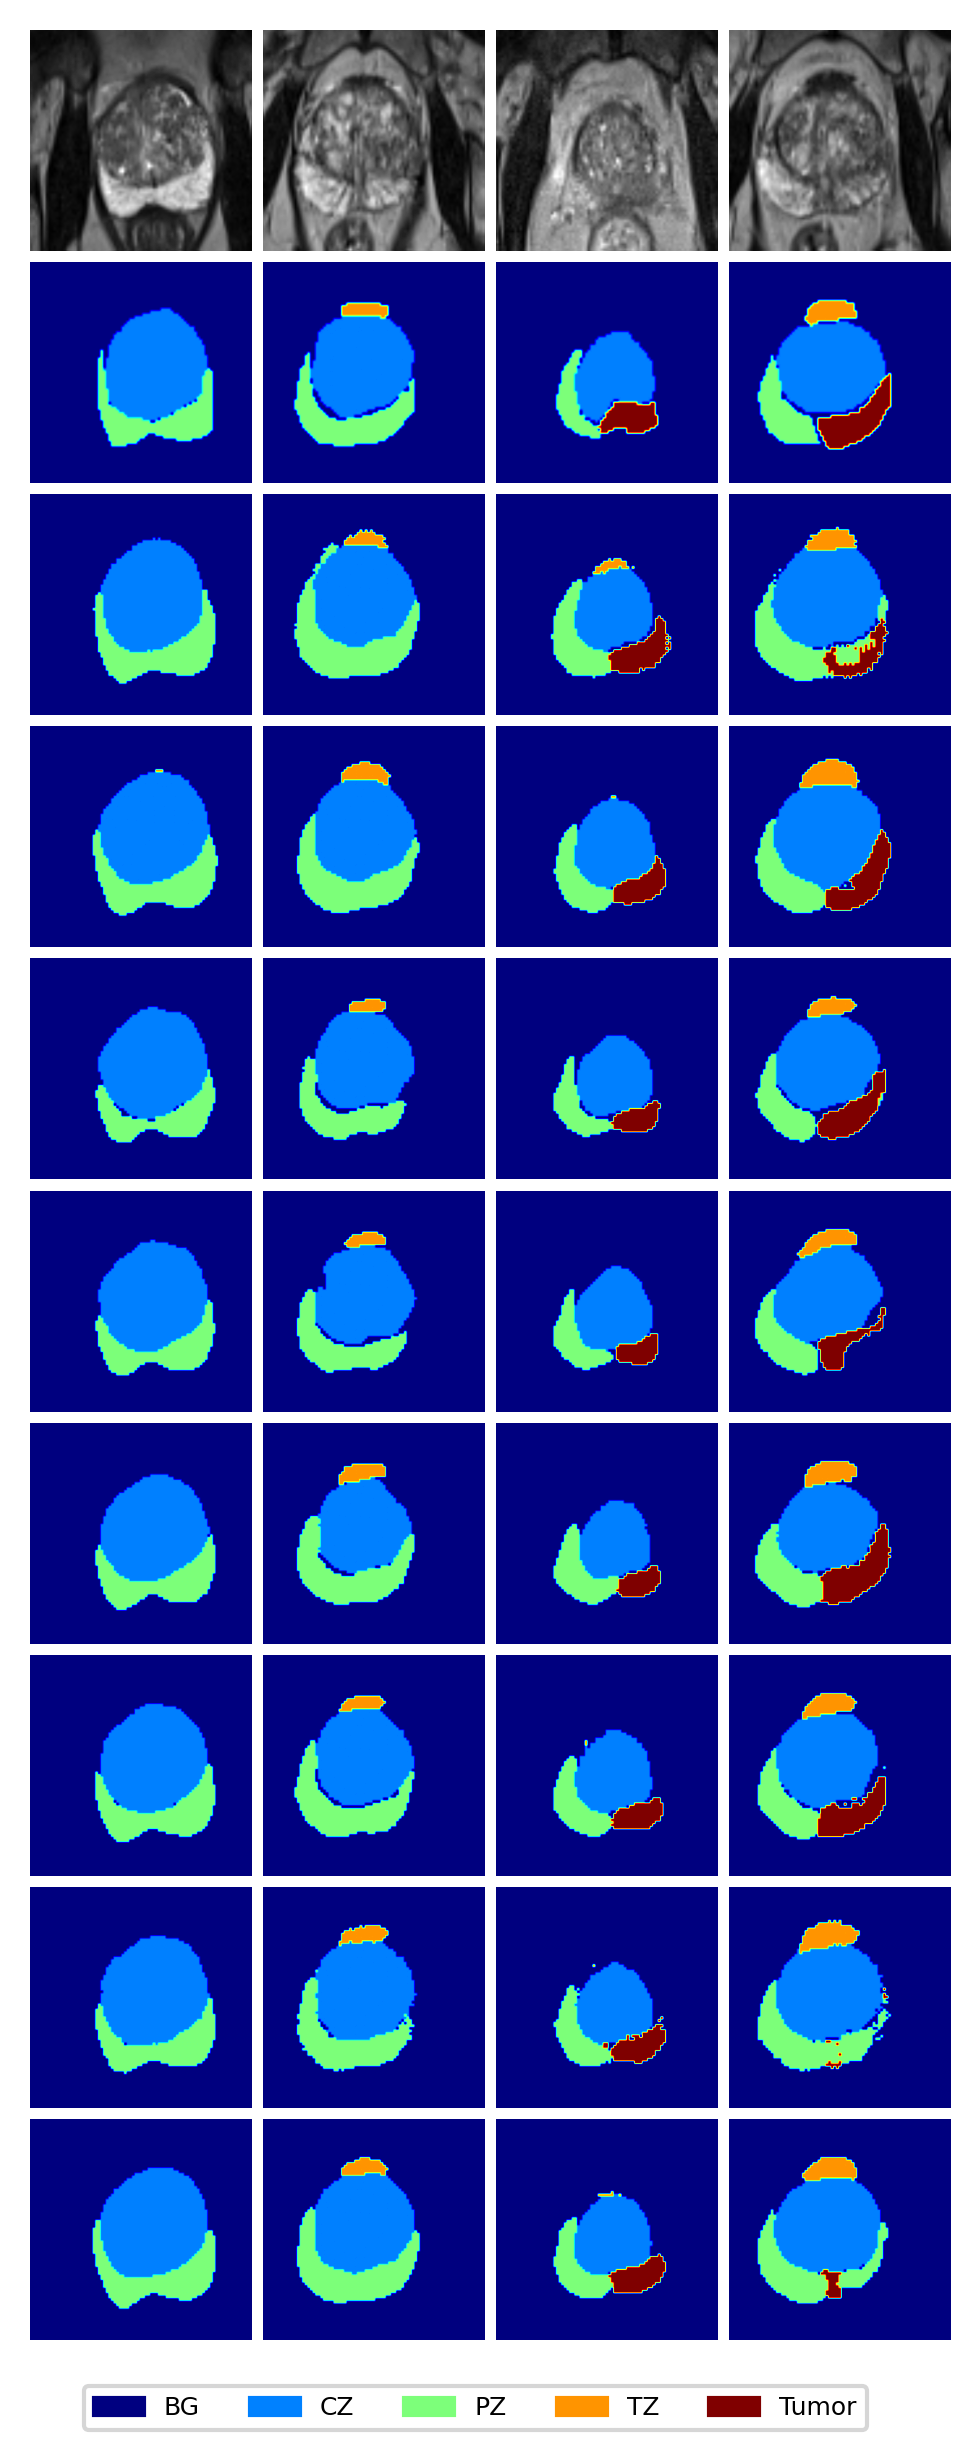

In [36]:

bounds = [0, 1, 2, 3, 4]
colors = ['darkblue', 'deepskyblue', 'brown', 'gold', 'orange']
cmap = mpl.colors.ListedColormap(colors)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


fig, ax = plt.subplots(nrows=10, ncols=4, figsize=(4,10), dpi=300)
ax[0,0].imshow(dict_imgs[z2], cmap='gray')
ax[0,0].axis('off')
ax[1,0].imshow(dict_msks[z2], cmap='jet', vmin=0, vmax=4)
ax[1,0].axis('off')


ax[0,1].imshow(dict_imgs[z3], cmap='gray')
ax[0,1].axis('off')
ax[1,1].imshow(dict_msks[z3], cmap='jet', vmin=0, vmax=4)
ax[1,1].axis('off')


ax[0,2].imshow(dict_imgs[z3t], cmap='gray')
ax[0,2].axis('off')
ax[1,2].imshow(dict_msks[z3t], cmap='jet', vmin=0, vmax=4)
ax[1,2].axis('off')


ax[0,3].imshow(dict_imgs[z4], cmap='gray')
ax[0,3].axis('off')
im1 = ax[1,3].imshow(dict_msks[z4], cmap='jet', vmin=0, vmax=4)
ax[1,3].axis('off')

###############################################


# UNET
ax[2,0].imshow(dict_preds['unet'][z2], cmap='jet', vmin=0, vmax=4)
ax[2,0].axis('off')
ax[2,1].imshow(dict_preds['unet'][z3], cmap='jet', vmin=0, vmax=4)
ax[2,1].axis('off')
ax[2,2].imshow(dict_preds['unet'][z3t], cmap='jet', vmin=0, vmax=4)
ax[2,2].axis('off')
ax[2,3].imshow(dict_preds['unet'][z4], cmap='jet', vmin=0, vmax=4)
ax[2,3].axis('off')

# Att UNet
ax[3,0].imshow(dict_preds['attunet'][z2], cmap='jet', vmin=0, vmax=4)
ax[3,0].axis('off')
ax[3,1].imshow(dict_preds['attunet'][z3], cmap='jet', vmin=0, vmax=4)
ax[3,1].axis('off')
ax[3,2].imshow(dict_preds['attunet'][z3t], cmap='jet', vmin=0, vmax=4)
ax[3,2].axis('off')
ax[3,3].imshow(dict_preds['attunet'][z4], cmap='jet', vmin=0, vmax=4)
ax[3,3].axis('off')

# Dense UNet
ax[4,0].imshow(dict_preds['denseunet'][z2], cmap='jet', vmin=0, vmax=4)
ax[4,0].axis('off')
ax[4,1].imshow(dict_preds['denseunet'][z3], cmap='jet', vmin=0, vmax=4)
ax[4,1].axis('off')
ax[4,2].imshow(dict_preds['denseunet'][z3t], cmap='jet', vmin=0, vmax=4)
ax[4,2].axis('off')
ax[4,3].imshow(dict_preds['denseunet'][z4], cmap='jet', vmin=0, vmax=4)
ax[4,3].axis('off')

# Att denseunet
ax[5,0].imshow(dict_preds['attdenseunet'][z2], cmap='jet', vmin=0, vmax=4)
ax[5,0].axis('off')
ax[5,1].imshow(dict_preds['attdenseunet'][z3], cmap='jet', vmin=0, vmax=4)
ax[5,1].axis('off')
ax[5,2].imshow(dict_preds['attdenseunet'][z3t], cmap='jet', vmin=0, vmax=4)
ax[5,2].axis('off')
im = ax[5,3].imshow(dict_preds['attdenseunet'][z4], cmap='jet', vmin=0, vmax=4)
ax[5,3].axis('off')

# R2U-Net 
ax[6,0].imshow(dict_preds['r2unet'][z2], cmap='jet', vmin=0, vmax=4)
ax[6,0].axis('off')
ax[6,1].imshow(dict_preds['r2unet'][z3], cmap='jet', vmin=0, vmax=4)
ax[6,1].axis('off')
ax[6,2].imshow(dict_preds['r2unet'][z3t], cmap='jet', vmin=0, vmax=4)
ax[6,2].axis('off')
im = ax[6,3].imshow(dict_preds['r2unet'][z4], cmap='jet', vmin=0, vmax=4)
ax[6,3].axis('off')

# Att R2U-Net 
ax[7,0].imshow(dict_preds['attr2unet'][z2], cmap='jet', vmin=0, vmax=4)
ax[7,0].axis('off')
ax[7,1].imshow(dict_preds['attr2unet'][z3], cmap='jet', vmin=0, vmax=4)
ax[7,1].axis('off')
ax[7,2].imshow(dict_preds['attr2unet'][z3t], cmap='jet', vmin=0, vmax=4)
ax[7,2].axis('off')
im = ax[7,3].imshow(dict_preds['attr2unet'][z4], cmap='jet', vmin=0, vmax=4)
ax[7,3].axis('off')

# Swinunet
ax[8,0].imshow(dict_preds['swinunet'][z2], cmap='jet', vmin=0, vmax=4)
ax[8,0].axis('off')
ax[8,1].imshow(dict_preds['swinunet'][z3], cmap='jet', vmin=0, vmax=4)
ax[8,1].axis('off')
ax[8,2].imshow(dict_preds['swinunet'][z3t], cmap='jet', vmin=0, vmax=4)
ax[8,2].axis('off')
im = ax[8,3].imshow(dict_preds['swinunet'][z4], cmap='jet', vmin=0, vmax=4)
ax[8,3].axis('off')

# FAUNET
ax[9,0].imshow(dict_preds['faunet'][z2], cmap='jet', vmin=0, vmax=4)
ax[9,0].axis('off')
ax[9,1].imshow(dict_preds['faunet'][z3], cmap='jet', vmin=0, vmax=4)
ax[9,1].axis('off')
ax[9,2].imshow(dict_preds['faunet'][z3t], cmap='jet', vmin=0, vmax=4)
ax[9,2].axis('off')
im = ax[9,3].imshow(dict_preds['faunet'][z4], cmap='jet', vmin=0, vmax=4)
ax[9,3].axis('off')

plt.subplots_adjust(wspace=0.01, hspace=0.05)
# plt.tight_layout()

import matplotlib.patches as mpatches
values2 = ['BG','CZ','PZ','TZ','Tumor']
values = [0,1,2,3,4]
colors = [ im.cmap(im.norm(value)) for value in values]
# create a patch (proxy artist) for every color 
patches = [ mpatches.Patch(color=colors[i], label=values2[i]) for i in range(len(values)) ]
# put those patched as legend-handles into the legend
fig.legend(handles=patches, ncol=5, prop={'size': 6}, loc=8, bbox_to_anchor=(0.5, 0.08), borderaxespad=0. )
plt.savefig('preds_original.png', dpi=300, bbox_inches='tight')
plt.show()



### Horizontal

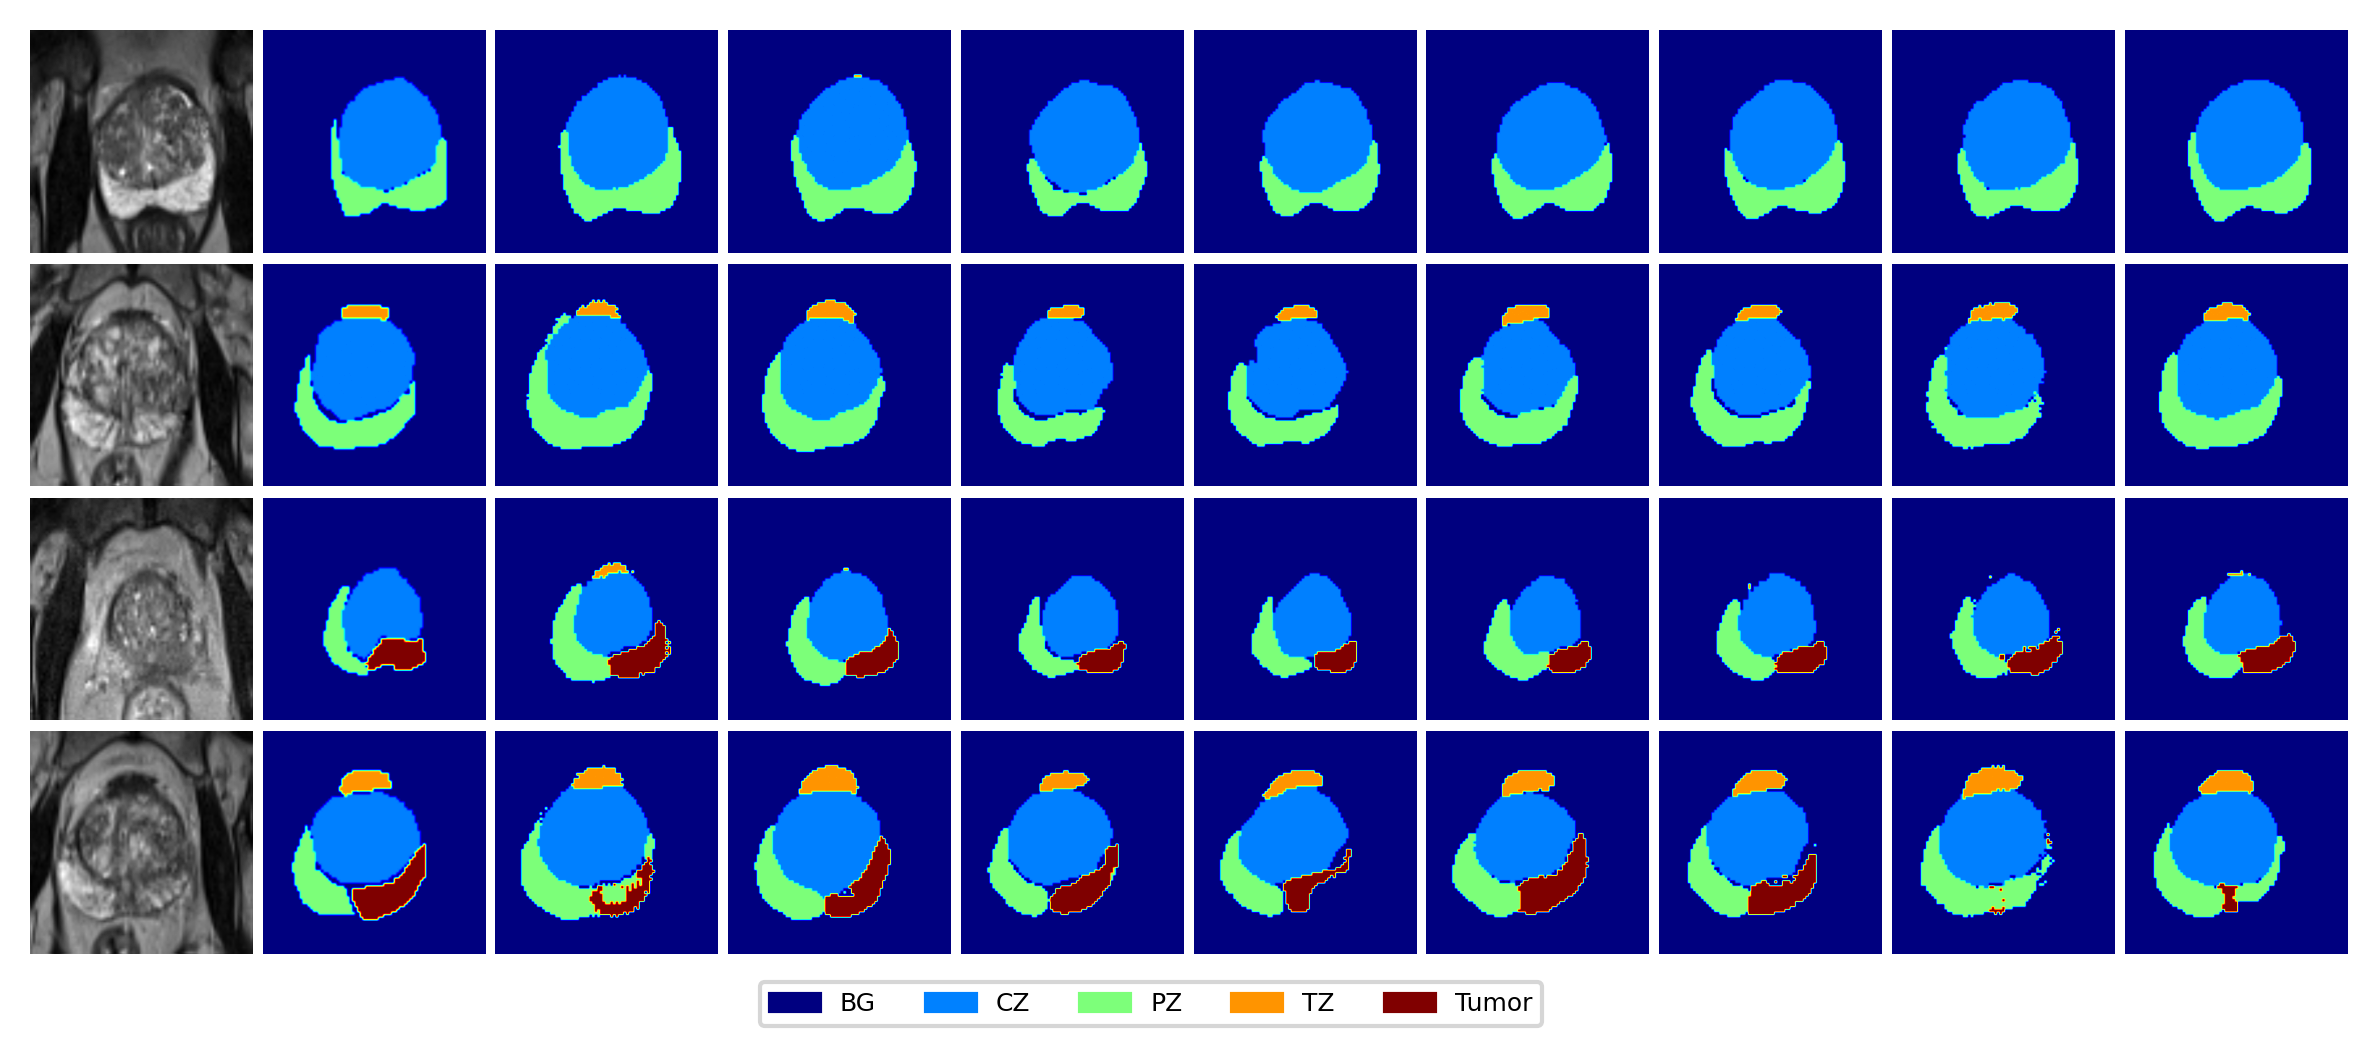

In [13]:

bounds = [0, 1, 2, 3, 4]
colors = ['darkblue', 'deepskyblue', 'brown', 'gold', 'orange']
cmap = mpl.colors.ListedColormap(colors)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


fig, ax = plt.subplots(nrows=4, ncols=10, figsize=(10,4), dpi=300)
ax[0,0].imshow(dict_imgs[z2], cmap='gray')
ax[0,0].axis('off')
ax[0,1].imshow(dict_msks[z2], cmap='jet', vmin=0, vmax=4)
ax[0,1].axis('off')


ax[1,0].imshow(dict_imgs[z3], cmap='gray')
ax[1,0].axis('off')
ax[1,1].imshow(dict_msks[z3], cmap='jet', vmin=0, vmax=4)
ax[1,1].axis('off')


ax[2,0].imshow(dict_imgs[z3t], cmap='gray')
ax[2,0].axis('off')
ax[2,1].imshow(dict_msks[z3t], cmap='jet', vmin=0, vmax=4)
ax[2,1].axis('off')


ax[3,0].imshow(dict_imgs[z4], cmap='gray')
ax[3,0].axis('off')
im1 = ax[3,1].imshow(dict_msks[z4], cmap='jet', vmin=0, vmax=4)
ax[3,1].axis('off')

###############################################


# UNET
ax[0,2].imshow(dict_preds['unet'][z2], cmap='jet', vmin=0, vmax=4)
ax[0,2].axis('off')
ax[1,2].imshow(dict_preds['unet'][z3], cmap='jet', vmin=0, vmax=4)
ax[1,2].axis('off')
ax[2,2].imshow(dict_preds['unet'][z3t], cmap='jet', vmin=0, vmax=4)
ax[2,2].axis('off')
ax[3,2].imshow(dict_preds['unet'][z4], cmap='jet', vmin=0, vmax=4)
ax[3,2].axis('off')

# Att UNet
ax[0,3].imshow(dict_preds['attunet'][z2], cmap='jet', vmin=0, vmax=4)
ax[0,3].axis('off')
ax[1,3].imshow(dict_preds['attunet'][z3], cmap='jet', vmin=0, vmax=4)
ax[1,3].axis('off')
ax[2,3].imshow(dict_preds['attunet'][z3t], cmap='jet', vmin=0, vmax=4)
ax[2,3].axis('off')
ax[3,3].imshow(dict_preds['attunet'][z4], cmap='jet', vmin=0, vmax=4)
ax[3,3].axis('off')

# Dense UNet
ax[0,4].imshow(dict_preds['denseunet'][z2], cmap='jet', vmin=0, vmax=4)
ax[0,4].axis('off')
ax[1,4].imshow(dict_preds['denseunet'][z3], cmap='jet', vmin=0, vmax=4)
ax[1,4].axis('off')
ax[2,4].imshow(dict_preds['denseunet'][z3t], cmap='jet', vmin=0, vmax=4)
ax[2,4].axis('off')
ax[3,4].imshow(dict_preds['denseunet'][z4], cmap='jet', vmin=0, vmax=4)
ax[3,4].axis('off')

# Att denseunet
ax[0,5].imshow(dict_preds['attdenseunet'][z2], cmap='jet', vmin=0, vmax=4)
ax[0,5].axis('off')
ax[1,5].imshow(dict_preds['attdenseunet'][z3], cmap='jet', vmin=0, vmax=4)
ax[1,5].axis('off')
ax[2,5].imshow(dict_preds['attdenseunet'][z3t], cmap='jet', vmin=0, vmax=4)
ax[2,5].axis('off')
im = ax[3,5].imshow(dict_preds['attdenseunet'][z4], cmap='jet', vmin=0, vmax=4)
ax[3,5].axis('off')

# R2U-Net 
ax[0,6].imshow(dict_preds['r2unet'][z2], cmap='jet', vmin=0, vmax=4)
ax[0,6].axis('off')
ax[1,6].imshow(dict_preds['r2unet'][z3], cmap='jet', vmin=0, vmax=4)
ax[1,6].axis('off')
ax[2,6].imshow(dict_preds['r2unet'][z3t], cmap='jet', vmin=0, vmax=4)
ax[2,6].axis('off')
im = ax[3,6].imshow(dict_preds['r2unet'][z4], cmap='jet', vmin=0, vmax=4)
ax[3,6].axis('off')

# Att R2U-Net 
ax[0,7].imshow(dict_preds['attr2unet'][z2], cmap='jet', vmin=0, vmax=4)
ax[0,7].axis('off')
ax[1,7].imshow(dict_preds['attr2unet'][z3], cmap='jet', vmin=0, vmax=4)
ax[1,7].axis('off')
ax[2,7].imshow(dict_preds['attr2unet'][z3t], cmap='jet', vmin=0, vmax=4)
ax[2,7].axis('off')
im = ax[3,7].imshow(dict_preds['attr2unet'][z4], cmap='jet', vmin=0, vmax=4)
ax[3,7].axis('off')

# Swinunet
ax[0,8].imshow(dict_preds['swinunet'][z2], cmap='jet', vmin=0, vmax=4)
ax[0,8].axis('off')
ax[1,8].imshow(dict_preds['swinunet'][z3], cmap='jet', vmin=0, vmax=4)
ax[1,8].axis('off')
ax[2,8].imshow(dict_preds['swinunet'][z3t], cmap='jet', vmin=0, vmax=4)
ax[2,8].axis('off')
im = ax[3,8].imshow(dict_preds['swinunet'][z4], cmap='jet', vmin=0, vmax=4)
ax[3,8].axis('off')

# FAUNET
ax[0,9].imshow(dict_preds['faunet'][z2], cmap='jet', vmin=0, vmax=4)
ax[0,9].axis('off')
ax[1,9].imshow(dict_preds['faunet'][z3], cmap='jet', vmin=0, vmax=4)
ax[1,9].axis('off')
ax[2,9].imshow(dict_preds['faunet'][z3t], cmap='jet', vmin=0, vmax=4)
ax[2,9].axis('off')
im = ax[3,9].imshow(dict_preds['faunet'][z4], cmap='jet', vmin=0, vmax=4)
ax[3,9].axis('off')

plt.subplots_adjust(wspace=0.01, hspace=0.05)
# plt.tight_layout()

import matplotlib.patches as mpatches
values2 = ['BG','CZ','PZ','TZ','Tumor']
values = [0,1,2,3,4]
colors = [ im.cmap(im.norm(value)) for value in values]
# create a patch (proxy artist) for every color 
patches = [ mpatches.Patch(color=colors[i], label=values2[i]) for i in range(len(values)) ]
# put those patched as legend-handles into the legend
fig.legend(handles=patches, ncol=5, prop={'size': 6}, loc=8, bbox_to_anchor=(0.5, 0.05), borderaxespad=0. )
plt.savefig('preds_horizontal.png', dpi=300, bbox_inches='tight')
plt.show()



# Boxplot

In [53]:
# Create empty lists to hold the numpy arrays
y_np_list = []

# Iterate over the BatchDataset object and get the numpy array for each batch
for batch_x, batch_y in test:
    y_np_list.append(batch_y.numpy())

# Convert the lists to numpy arrays
y_np = np.concatenate(y_np_list, axis=0)
y = np.argmax(y_np, axis=3)

print(y.shape)

(31, 256, 256)


In [224]:
## Uncomment to calculate iou per image per class ################################
import pandas as pd
n_classes = 5
df_models = pd.DataFrame()
boxplot_values = []
m_ious = []
best_iou = 0
worst_iou = 1
mean_iou = 0
i_mean_iou = 0
for j in range(0, len(preds_models)):
        model_values = []
        m_iou = []
        for i in range(0,31):
                IOU_keras_indv = tf.keras.metrics.MeanIoU(num_classes=n_classes)
                IOU_keras_indv.update_state(y[i], preds_models[j][1][i])
                meanIOU = IOU_keras_indv.result().numpy()
                if meanIOU > best_iou:
                        best_iou = meanIOU
                        i_best_iou = i
                if meanIOU < worst_iou:
                        worst_iou = meanIOU
                        i_worst_iou = i
                if meanIOU == mean_iou:
                        mean_iou = meanIOU
                        i_mean_iou = i


                # To calculate I0U for each class...
                values = np.array(IOU_keras_indv.get_weights()).reshape(n_classes, n_classes)
                # print(values)
                class1_IoU = values[0, 0] / (
                        values[0, 0] + values[0, 1] + values[0, 2] + values[0, 3] + values[0, 4] + values[1, 0] + values[2, 0] +
                        values[3, 0] + values[4, 0])
                class2_IoU = values[1, 1] / (
                        values[1, 1] + values[1, 0] + values[1, 2] + values[1, 3] + values[1, 4] + values[0, 1] + values[2, 1] +
                        values[3, 1] + values[4, 1])
                class3_IoU = values[2, 2] / (
                        values[2, 2] + values[2, 0] + values[2, 1] + values[2, 3] + values[2, 4] + values[0, 2] + values[1, 2] +
                        values[3, 2] + values[4, 2])
                class4_IoU = values[3, 3] / (
                        values[3, 3] + values[3, 0] + values[3, 1] + values[3, 2] + values[3, 4] + values[0, 3] + values[1, 3] +
                        values[2, 3] + values[4, 3])
                class5_IoU = values[4, 4] / (
                        values[4, 4] + values[4, 0] + values[4, 1] + values[4, 2] + values[4, 3] + values[0, 4] + values[1, 4] +
                        values[2, 4] + values[3, 4])

                m_iou.append(meanIOU)

                values_classes = np.array([class2_IoU,class3_IoU,class4_IoU,class5_IoU])
                # values_classes = np.nan_to_num(values_classes, copy=False)
                model_values.append(values_classes)
        m_iou = np.array(m_iou)
        m_ious.append(m_iou)
        model_values = np.array(model_values)
        # df_models[preds_models[j][0]] = model_values
        boxplot_values.append(model_values)
m_ious = np.array(m_ious)
boxplot_values = np.array(boxplot_values)

# print('el mejor: ', i_best_iou)
# print('el mejor: ', best_iou)

# print('el peor: ', i_worst_iou)
# print('el peor: ', worst_iou)
# print('el promedio: ', i_mean_iou)
# print(boxplot_values[0])
# print(boxplot_values.shape)
# np.save(f'iou_test_{weights_name}', boxplot_values)

C:\Users\pablo\AppData\Local\Temp\ipykernel_403228\3268442594.py:41: RuntimeWarning: invalid value encountered in scalar divide
  class4_IoU = values[3, 3] / (
C:\Users\pablo\AppData\Local\Temp\ipykernel_403228\3268442594.py:44: RuntimeWarning: invalid value encountered in scalar divide
  class5_IoU = values[4, 4] / (


In [231]:
m_ious

array([0.7302119 , 0.7607033 , 0.76474726, 0.75062335, 0.74427223,
       0.76531494, 0.75044173, 0.7533878 ], dtype=float32)

In [230]:
m_ious = np.mean(m_ious, axis=1)
m_ious

AxisError: axis 1 is out of bounds for array of dimension 1

In [212]:
df_models = {preds_models[0][0]: pd.DataFrame(boxplot_values[0]),
             preds_models[1][0]: pd.DataFrame(boxplot_values[1]),
             preds_models[2][0]: pd.DataFrame(boxplot_values[2]),
             preds_models[3][0]: pd.DataFrame(boxplot_values[3]),
             preds_models[4][0]: pd.DataFrame(boxplot_values[4]),
             preds_models[5][0]: pd.DataFrame(boxplot_values[5]),
             preds_models[6][0]: pd.DataFrame(boxplot_values[6]),
             preds_models[7][0]: pd.DataFrame(boxplot_values[7]),
             }
df_models.keys()

dict_keys(['unet', 'r2unet', 'attr2unet', 'swinunet', 'denseunet', 'faunet', 'attunet', 'attdenseunet'])

In [213]:
for i in list(df_models.keys()):
    df_models[i] = df_models[i].rename(columns={0:'CZ', 1:'PZ', 2:'TZ', 3:'Tumor'})
    df_models[i] = df_models[i].replace(0,np.nan)
    df_models[i]['Model'] = i


In [214]:
combined_df = pd.concat([df_models['unet'], df_models['attunet'], df_models['denseunet'], df_models['attdenseunet'], df_models['swinunet'], df_models['faunet'], df_models['r2unet'],df_models['attr2unet']], ignore_index=True)
# sns.set_theme(style="ticks")
# sns.pairplot(combined_df, hue="Model")
mdf = pd.melt(combined_df, id_vars=['Model'], var_name=['Zones'], value_name='IoU')
mdf

,Model,Zones,IoU
0,unet,CZ,0.781421
1,unet,CZ,0.894292
2,unet,CZ,0.928000
3,unet,CZ,0.868020
4,unet,CZ,0.883459
...,...,...,...
987,attr2unet,Tumor,NaN
988,attr2unet,Tumor,0.623810
989,attr2unet,Tumor,NaN
990,attr2unet,Tumor,0.728495


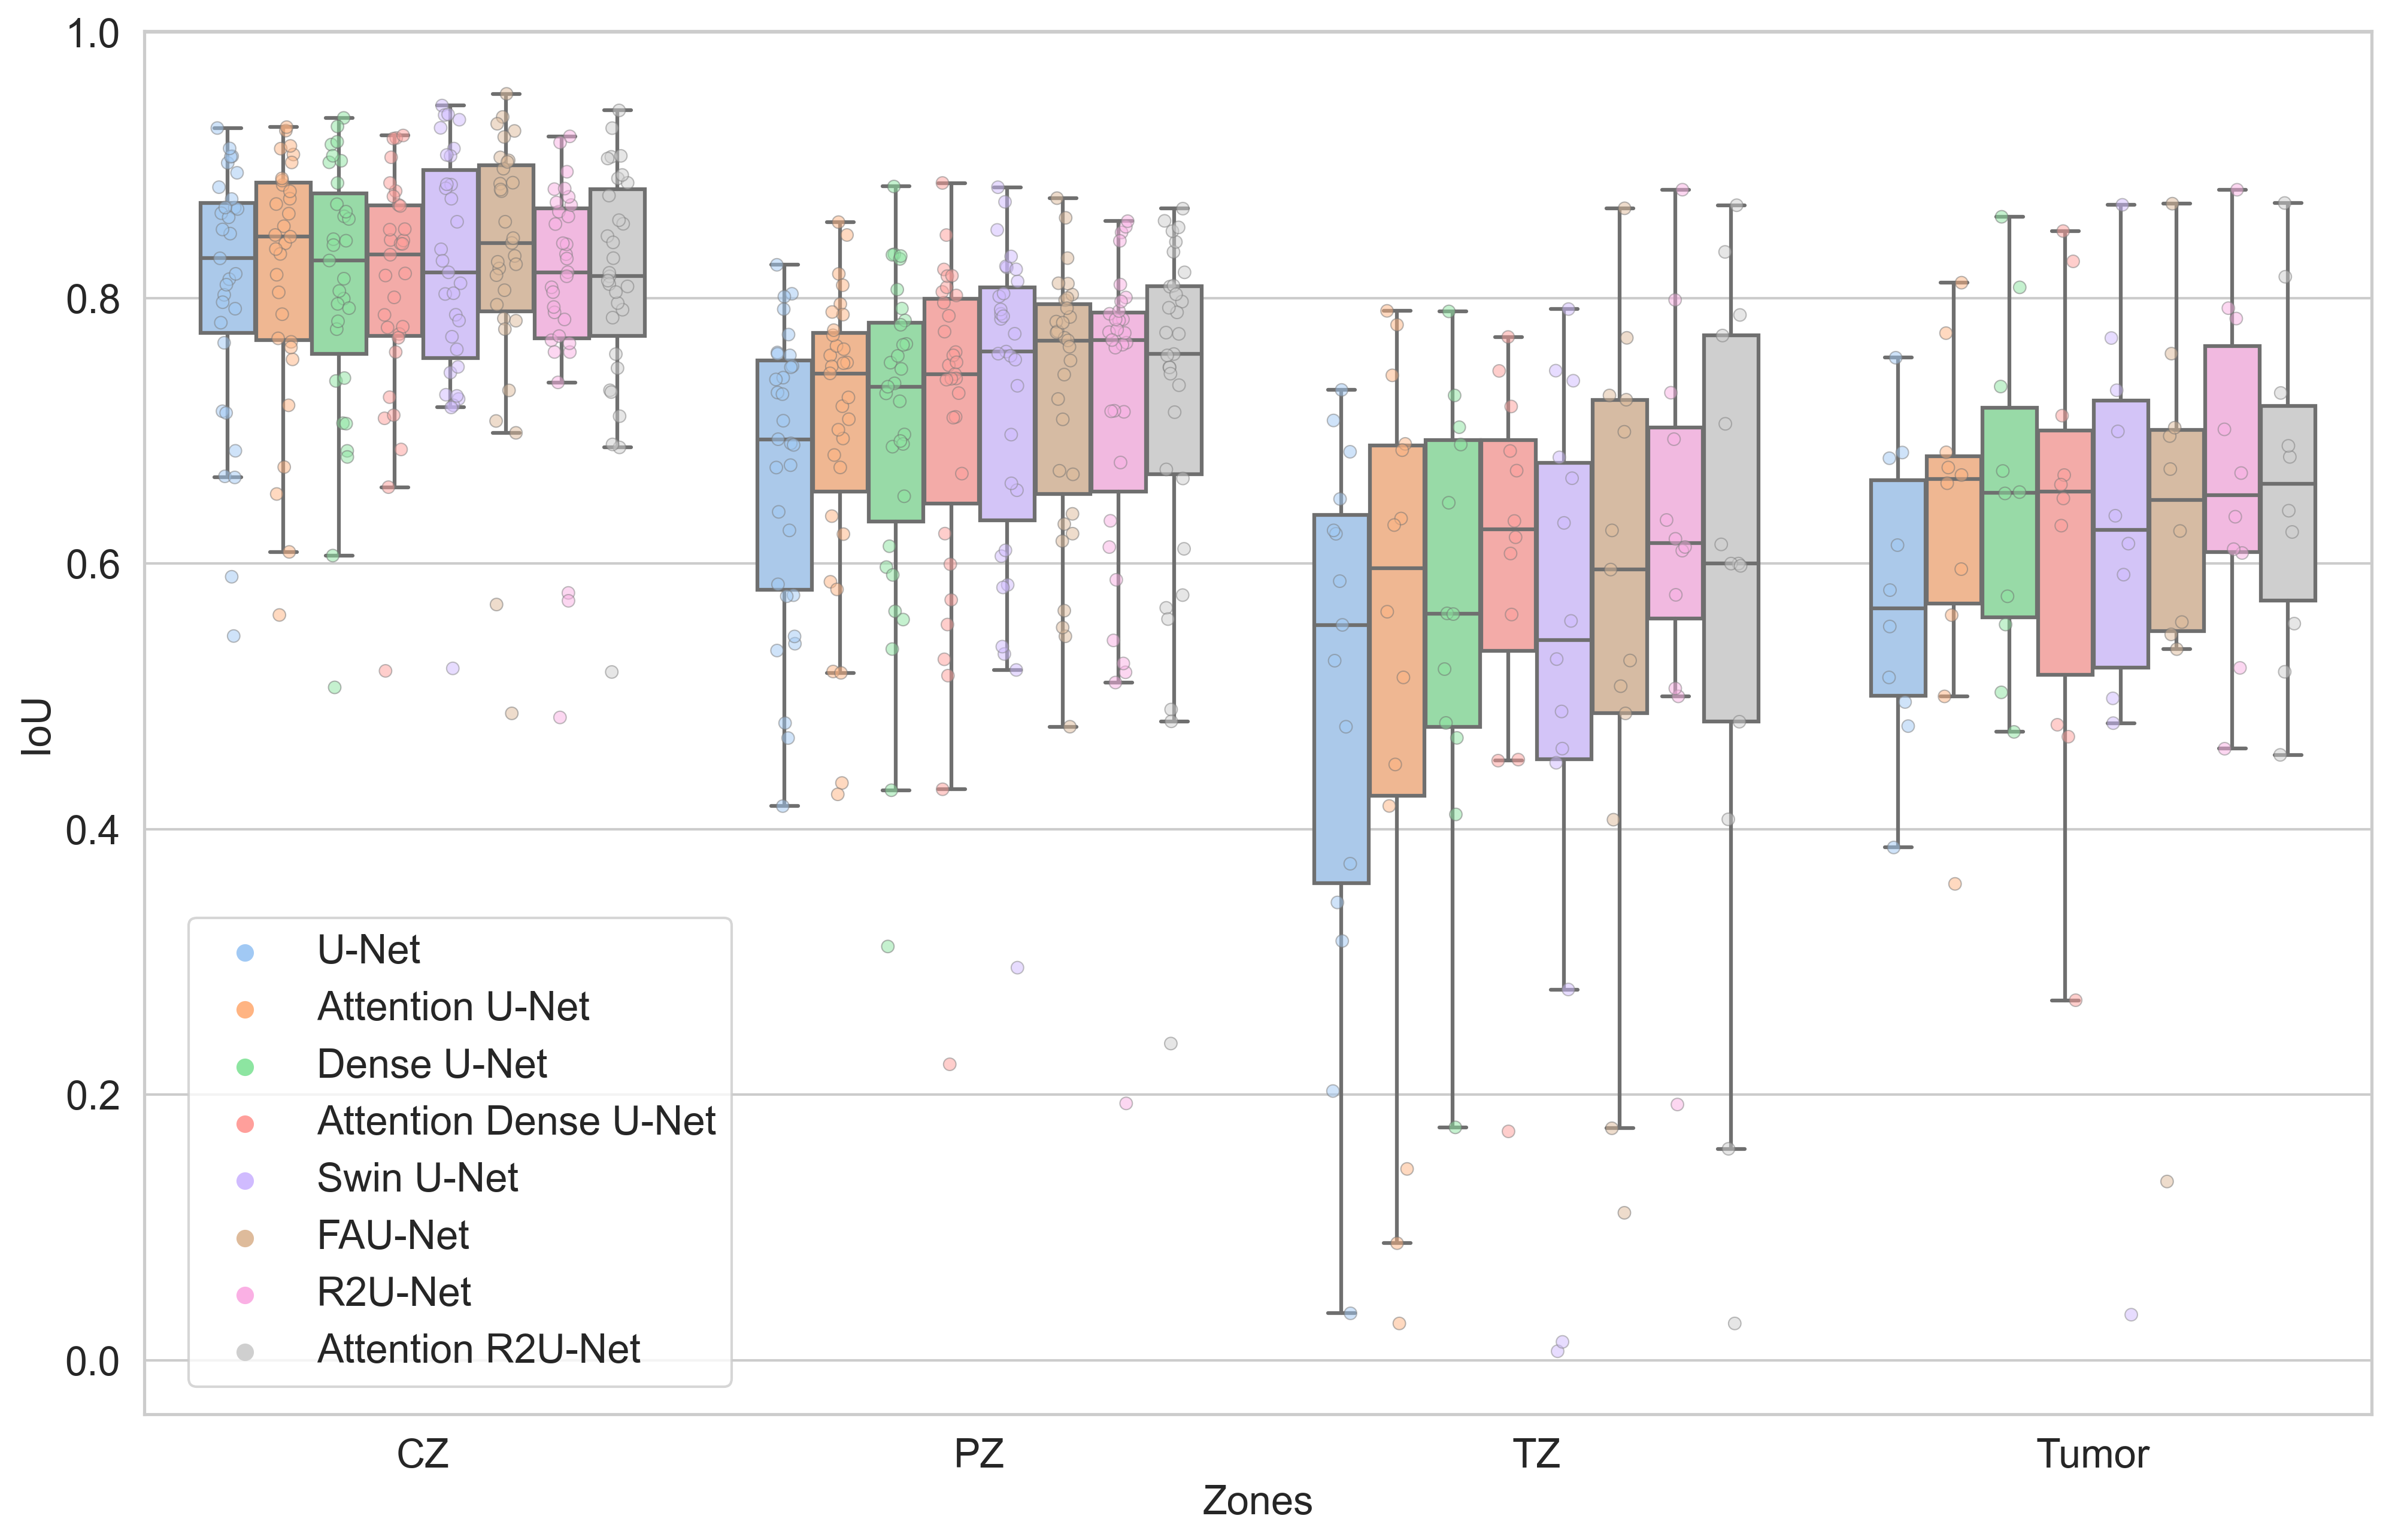

In [233]:
import pandas as pd
import seaborn as sns
plt.rcParams['font.size'] = 20
plt.figure(figsize=[16,10],dpi=300)
sns.set_style("whitegrid")

ax_1 = sns.stripplot(x='Zones', y='IoU', hue='Model', data=mdf, size=5, jitter=0.15, dodge= True, 
              linewidth=0.5, edgecolor='gray', palette='pastel', alpha=0.5)
ax_2 = sns.boxplot(x="Zones", y="IoU", hue="Model", data=mdf, fliersize= 0,
                 palette='pastel', showmeans=False, meanprops={"marker": "*",
                       "markeredgecolor": "black",
                       "markersize": "5",
                       "markerfacecolor": 'black'})

handles, labels = ax_2.get_legend_handles_labels()
labels2 = ['U-Net', 'Attention U-Net', 'Dense U-Net', 'Attention Dense U-Net', 'Swin U-Net', 'FAU-Net', 'R2U-Net', 'Attention R2U-Net']
l = ax_2.legend(handles[0:8], labels2, bbox_to_anchor=(0.02, 0.02), loc='lower left', borderaxespad=0., fontsize=16)
ax_2.tick_params(axis='both', labelsize=16)
ax_2.set_xlabel('Zones', fontsize=16)
ax_2.set_ylabel('IoU', fontsize=16)
# Show the plot
plt.savefig('boxplot_iou.png', bbox_inches='tight')
plt.show()


In [216]:
meandf = pd.DataFrame({'UNet':df_models['unet'].mean(numeric_only=True),
            'Attention UNet': df_models['attunet'].mean(numeric_only=True),
            'Dense UNet': df_models['denseunet'].mean(numeric_only=True),
            'Attention Dense UNet': df_models['attdenseunet'].mean(numeric_only=True),
            'R2U-Net': df_models['r2unet'].mean(numeric_only=True),
            'Attention R2U-Net': df_models['attr2unet'].mean(numeric_only=True),
            'Swin U-Net': df_models['swinunet'].mean(numeric_only=True),
            'FAU-Net': df_models['faunet'].mean(numeric_only=True),
            })
meandf.style.highlight_max(color = 'lightgreen', 
                       axis = 1).highlight_min(color = 'red', axis=1)


,UNet,Attention UNet,Dense UNet,Attention Dense UNet,R2U-Net,Attention R2U-Net,Swin U-Net,FAU-Net
CZ,0.807299,0.818742,0.807814,0.807980,0.801678,0.812354,0.820255,0.826388
PZ,0.671336,0.701692,0.699818,0.703224,0.711900,0.720343,0.718974,0.725523
TZ,0.495753,0.511060,0.561255,0.590532,0.612615,0.573612,0.502415,0.555557
Tumor,0.573843,0.628427,0.648470,0.621261,0.666382,0.657795,0.592563,0.609614
